# Desafio Cientista de Dados

## Introdução

Olá candidato(a), o objetivo deste desafio é testar os seus conhecimentos sobre a resolução de problemas de negócios, análise de dados e aplicação de modelos preditivos. Queremos testar seus conhecimentos dos conceitos estatísticos de modelos preditivos, criatividade na resolução de problemas e aplicação de modelos básicos de machine learning.  É importante deixar claro que não existe resposta certa e que o que nos interessa é sua capacidade de descrever e justificar os passos utilizados na resolução do problema.

### Desafio

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma **análise exploratória dos dados** de seu maior concorrente, assim como um **teste de validação de um modelo preditivo**.

Seu objetivo é desenvolver um **modelo de previsão de preços** a partir do dataset oferecido, e **avaliar** tal modelo utilizando as **métricas de avaliação que mais fazem sentido para o problema**. O uso de **outras fontes de dados** além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.

### Entregas

1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. **Seja criativo!**

2. Responda também às seguintes perguntas:
    - Supondo que uma pessoa esteja pensando em investir em um **apartamento para alugar** na plataforma, **onde seria mais indicada a compra**?
    - O **número mínimo de noites** e a **disponibilidade** ao longo do ano **interferem no preço**?
    - Existe algum **padrão no texto do nome do local** para **lugares de mais alto valor**?

3. Explique **como você faria a previsão do preço a partir dos dados**. Quais **variáveis** e/ou suas **transformações** você utilizou e **por quê**? Qual **tipo de problema** estamos resolvendo (regressão, classificação)? Qual **modelo melhor se aproxima dos dados** e quais seus **prós e contras**? Qual **medida de performance** do modelo foi **escolhida** e **por quê**?

4. Supondo um apartamento com as seguintes características, **qual seria a sua sugestão de preço**?:

        {'id': 2595,
        'nome': 'Skylit Midtown Castle',
        'host_id': 2845,
        'host_name': 'Jennifer',
        'bairro_group': 'Manhattan',
        'bairro': 'Midtown',
        'latitude': 40.75362,
        'longitude': -73.98377,
        'room_type': 'Entire home/apt',
        'minimo_noites': 1,
        'numero_de_reviews': 45,
        'ultima_review': '2019-05-21',
        'reviews_por_mes': 0.38,
        'calculado_host_listings_count': 2,
        'disponibilidade_365': 355}

5. **Salve o modelo desenvolvido** no formato .pkl. 

6. A entrega deve ser feita através de um *repositório de código público* que contenha:
    - README explicando como instalar e executar o projeto
    - Arquivo de requisitos com todos os pacotes utilizados e suas versões
    - Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
    - Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
    - Arquivo .pkl conforme passo 5 acima.

7. Um vídeo curto explicando o desenvolvimento de suas entregas deste desafio, como você planejou e executou as atividades propostas. O vídeo deverá ser entregue via link via Google Drive. Lembre-se de autorizar o acesso para "qualquer pessoa com o link".

Todos os códigos produzidos devem seguir as boas práticas de codificação.

### Prazo

Você tem até 7 dias corridos para a entrega, contados a partir do recebimento deste desafio. O não cumprimento deste prazo implica na desclassificação do processo seletivo.
A Indicium possui ferramentas avançadas de detecção de plágio e inteligência artificial. A utilização de IA implica na desclassificação do processo seletivo.

Envie o seu relatório dentro da sua data limite para o email: **selecao.lighthouse@indicium.tech**

O arquivo de entrega deve ser nomeado como: **LH_CD_SEUNOME**

Bom trabalho!

## Dicionário dos dados

A base de dados de treinamento contém 16 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

- id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
- nome - Representa o nome do anúncio
- host_id - Representa o id do usuário que hospedou o anúncio
- host_name – Contém o nome do usuário que hospedou o anúncio
- bairro_group - Contém o nome do bairro onde o anúncio está localizado (Burgo)
- bairro - Contém o nome da área onde o anúncio está localizado (Bairro)
- latitude - Contém a latitude do local
- longitude - Contém a longitude do local
- room_type – Contém o tipo de espaço de cada anúncio
- price - Contém o preço por noite em dólares listado pelo anfitrião
- minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
- numero_de_reviews - Contém o número de comentários dados a cada listagem
- ultima_review - Contém a data da última revisão dada à listagem
- reviews_por_mes - Contém o número de avaliações fornecidas por mês
- calculado_host_listings_count - Contém a quantidade de listagem por host
- disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

# Desafio:

### Imports

In [2]:
import pandas as pd
import numpy as np
import sklearn
from math import log10
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler #, MinMaxScaler

#from scipy import stats
#from scipy.stats import wilcoxon

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
from random import randint
import logging
#from imblearn.over_sampling import SMOTE

# Regressão
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import graphviz

# Avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import StackingClassifier

Identifiquei que este dataset é um dataset de com informações de aluguéis pelo airbnb em Nova York até 2019. Como os dados são abertos para coleta pelo site [Inside Airbnb](https://insideairbnb.com), decidi coletar dados atualizados para análise. Este dataset extra foi compartilhado em 4 de Novembro de 2024 e está disponível para download em https://insideairbnb.com/get-the-data/.

In [108]:
df = pd.read_csv('teste_indicium_precificacao.csv')
X, y = df.drop(columns=['price']), df['price']

# (apenas para facilitar compreensão do dataset)
df = X
df['price'] = y

df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,price
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2019-05-21,0.38,2,355,225
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,NaN,1,365,150
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,2019-07-05,4.64,1,194,89
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,2018-11-19,0.10,1,0,80
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,2019-06-22,0.59,1,129,200


In [ ]:
df_new = pd.read_csv('listings.csv')

df_new.rename(columns={'name': 'nome', 
                       'neighbourhood_group': 'bairro_group', 
                       'neighbourhood': 'bairro',
                       'minimum_nights': 'minimo_noites',
                       'calculated_host_listings_count': 'calculado_host_listings_count',
                       'availability_365': 'disponibilidade_365',
                       'number_of_reviews': 'numero_de_reviews',
                       'last_review': 'ultima_review',
                       'reviews_per_month': 'reviews_por_mes'}, inplace=True) # trocando nomes das colunas para o merge

df_new = df_new.drop(index=df_new[df_new['price'].isna()].index) # retirando instâncias com o preço de aluguel faltando

df_new.index = [idx for idx in range(len(df_new))] # reiniciando o index (tvz desnecessário)

X_new = df_new.drop(columns=['price', 'license', 'number_of_reviews_ltm']) # tinham colunas extras que não se encaixavam

y_new = df_new['price']

df_new = X_new
df_new['price'] = y_new

df_new.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,price
0,2595,Skylit Midtown Castle Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,30,49,2022-06-21,0.27,3,365,240.0
1,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,30,195,2024-10-05,1.04,1,185,83.0
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,30,1,2022-06-05,0.03,2,83,65.0
3,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,30,250,2024-10-31,1.37,1,284,71.0
4,7097,"Perfect for Your Parents, With Garden & Patio",17571,Jane,Brooklyn,Fort Greene,40.69194,-73.97389,Private room,2,390,2024-10-27,2.16,2,215,205.0


In [134]:
df_new.columns == df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [122]:
df.isna().any()

id                               False
nome                              True
host_id                          False
host_name                         True
bairro_group                     False
bairro                           False
latitude                         False
longitude                        False
room_type                        False
minimo_noites                    False
numero_de_reviews                False
ultima_review                     True
reviews_por_mes                   True
calculado_host_listings_count    False
disponibilidade_365              False
price                            False
dtype: bool

In [139]:
df_new.isna().any()

id                               False
nome                             False
host_id                          False
host_name                        False
bairro_group                     False
bairro                           False
latitude                         False
longitude                        False
room_type                        False
minimo_noites                    False
numero_de_reviews                False
ultima_review                     True
reviews_por_mes                   True
calculado_host_listings_count    False
disponibilidade_365              False
price                            False
dtype: bool

In [146]:
teste = pd.merge(df, df_new, how='inner', left_on='id', right_on='id')
print(len(df_new)-len(teste), len(teste))

18639 4102


Com isso, poderei adicionar 18639 instâncias novas e atualizar 4102 instâncias já existentes.

In [128]:
teste['price_y'].notna().sum()

4102

## Análise dos dados

In [81]:
df.loc[df['price']>=1000, ['bairro']].value_counts()

bairro         
Upper West Side    30
Midtown            23
Tribeca            17
Upper East Side    16
Chelsea            15
                   ..
East Flatbush       1
Cypress Hills       1
Columbia St         1
City Island         1
Arverne             1
Name: count, Length: 66, dtype: int64

In [78]:
df['bairro_group'].value_counts()

bairro_group
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [ ]:
df.drop(columns=['id','host_id']).describe() # os ids não são úteis aqui 

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,price
count,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,7.030085,23.274758,1.373251,7.144005,112.776169,152.720763
std,0.054529,0.046157,20.510741,44.550991,1.680453,32.952855,131.618692,240.156625
min,40.499790,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,40.690100,-73.983070,1.000000,1.000000,0.190000,1.000000,0.000000,69.000000
50%,40.723075,-73.955680,3.000000,5.000000,0.720000,1.000000,45.000000,106.000000
75%,40.763117,-73.936273,5.000000,24.000000,2.020000,2.000000,227.000000,175.000000
max,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000,10000.000000


In [7]:
df.isna().any()

id                               False
nome                              True
host_id                          False
host_name                         True
bairro_group                     False
bairro                           False
latitude                         False
longitude                        False
room_type                        False
minimo_noites                    False
numero_de_reviews                False
ultima_review                     True
reviews_por_mes                   True
calculado_host_listings_count    False
disponibilidade_365              False
price                            False
dtype: bool

In [9]:
df['ultima_review'].isna() or df['reviews_por_mes'].isna()

,ultima_review,reviews_por_mes
0,False,False
1,True,True
2,False,False
3,False,False
4,False,False
...,...,...
48889,True,True
48890,True,True
48891,True,True
48892,True,True


In [35]:
# testar se as instâncias nulas de ultima_review tbm possuem reviews_por_mes nulas
print((df['ultima_review'].isna() | df['reviews_por_mes'].isna()).sum() == (df['ultima_review'].isna() & df['reviews_por_mes'].isna()).sum())

# verificar se todas as instâncias que não possuem nenhuma review são 
# exatamente as mesmas que possuem ultima_review e reviews_por_mes
((df['numero_de_reviews']==0) == (df['ultima_review'].isna() & df['reviews_por_mes'].isna())).all()

True


True

Logo, todas as instâncias sem reviews possuem os atributos ```ultima_review = NaN``` e ```reviews_por_mes = NaN```.

In [ ]:
# como devo transformar as instâncias nulas? Faz sentido trocar a nota da reviews por algo similar aos parecidos,
# mas com o número de reviews por mês faria mais sentido substituir por 0... Será que atrapalharia no julgamento?

df

In [73]:
df['price'].describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
10%         49.000000
20%         60.000000
30%         75.000000
40%         90.000000
50%        106.000000
60%        130.000000
70%        155.000000
80%        200.000000
90%        269.000000
95%        355.000000
99%        799.000000
max      10000.000000
Name: price, dtype: float64

<Axes: ylabel='Count'>

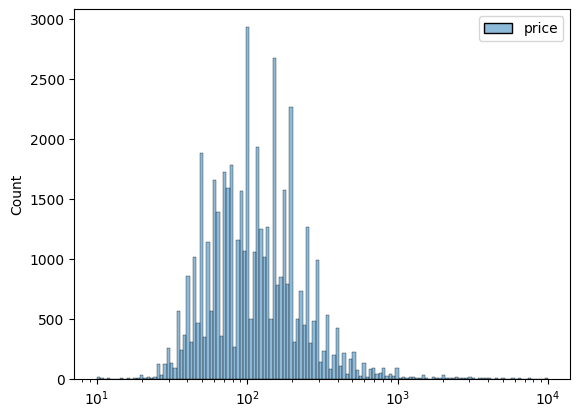

In [75]:
sns.histplot(df[['price']], log_scale=True)

In [ ]:
df.loc[df['price'] <= 500, ['bairro']].hist()

In [93]:
df['ultima_review'].sort_values(ascending=False)

48851    2019-07-08
14962    2019-07-08
47438    2019-07-08
33791    2019-07-08
44784    2019-07-08
            ...    
48889           NaN
48890           NaN
48891           NaN
48892           NaN
48893           NaN
Name: ultima_review, Length: 48894, dtype: object

array([[<Axes: title={'center': 'price'}>]], dtype=object)

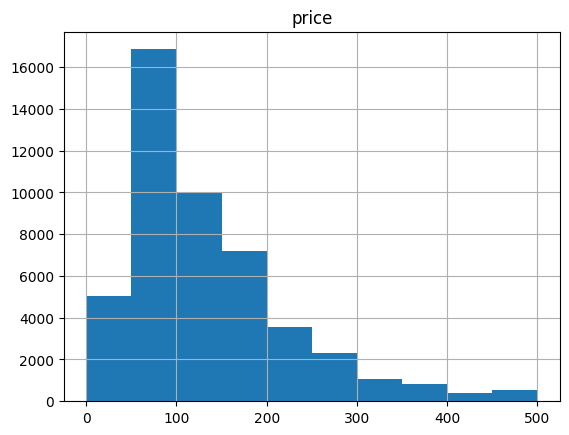

In [69]:
df.loc[df['price'] <= 500, ['price']].hist()

In [45]:
len(df[df['price'] >= 500])

1235

<Axes: xlabel='longitude', ylabel='latitude'>

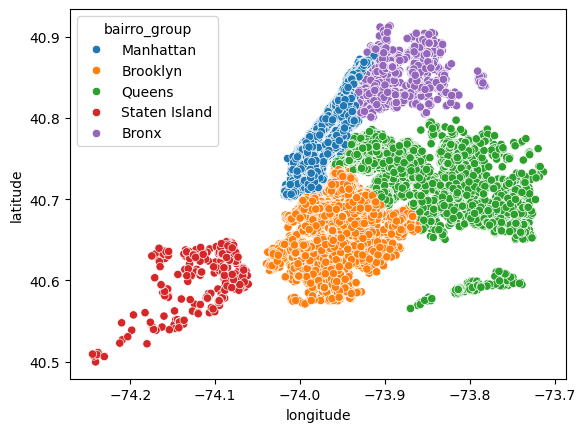

In [90]:
viridis = palette=sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(df, x='longitude', y='latitude', hue='bairro_group')#hue='price', linewidth=0.1, palette=viridis)